In [12]:
try:
  from google.colab import drive
  drive.mount('/content/drive/')
  shared_drive_foldername = 'NUTRECON'
  root = '/content/drive/Shareddrives/{}/'.format(shared_drive_foldername)
  !pip install pandas==1.4.2
  print('Running Code in Colab')
# ...or locally
except:
  # define the local directory of the project
  root = 'D:/FV/Projects/NUTRECON/nutreconDrive/'
  # root = '/mnt/data1/francisco/Projects/NUTRECON/nutreconDrive/'
  print('Running Code locally')

import numpy as np
import pandas as pd
import sys
sys.path.append(root + 'python')
import nutrecon_simulation as sim
from variableCoding import Vars
_v_ = Vars()

import plotly.express as px

beahviour_cols = sim.optimize_cols[:-4]

def get_probLottery(group):
  prob_lotteryChoice = len(group[group['choice'] == 1]) / uniqueLott_Nreps
  return prob_lotteryChoice

Running Code locally


# Testing Functions & routines

## Task parameters

In [13]:
uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# # ---------------------------- Levy & Glimcher ------------------------------

# # Same-type & mixed type Trials Lottery probabilities
# st_refPs = [1]                                  # Reference option
# st_lottPs = [0.13, 0.22, 0.38, .50, .75]        # Lottery option

# # Same-type task variables
# st_money_refQs = [2]                            # Dolars
# st_money_lottQs = [2, 4.5, 10, 22.5, 50]        # Dolars

# st_cPlus_refQs = [5]                            # candies
# st_cPlus_lottQs = [5, 10, 20, 40, 80]           # candies
# # st_cPlus_refQs = [2]                          # crackers
# # st_cPlus_lottQs = [2, 5, 10, 20, 40]          # crackers

# st_cMinus_refQs = [60]                          # mL water
# st_cMinus_lottQs = [60, 125, 250, 500, 1000]    # mL water

# # Mixed-type task variables
# mt_refQs = [.2]                                 # Dolars
# mt_refPs = [1]
# mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

# mt_cPlus_lottQs = [10, 20, 30, 50,  80]         # candies
# # mt_cPlus_lottQs = [5, 10, 15, 25,  40]        # candies
# mt_cMinus_lottQs = [125, 250, 400, 600,  1000]  # water 

# -------------------------------- NUTRECON ---------------------------------

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [1]                               # Euros
st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 60, 120]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))

Trials per type:
same     390
mixed    300
Name: trial_type, dtype: int64


## Subject specific parameters

In [29]:
# Subject specific parameters
st_money_alpha = 0.7
st_cPlus_alpha = 0.5
st_cMinus_alpha = 0.4

st_money_beta = 2.5
st_cPlus_beta = st_money_beta
st_cMinus_beta = st_money_beta

mt_cPlus_beta = st_money_beta
mt_cMinus_beta = st_money_beta

cPlus_sFactor = .05
cMinus_sFactor = .05

subjectTrials_df = sim._pack_subjectParameters(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, st_money_beta, 
                                              st_cPlus_beta, st_cMinus_beta, mt_cPlus_beta, mt_cMinus_beta, 
                                              cPlus_sFactor, cMinus_sFactor, 
                                              allTrials_df)
subjectTrials_df


,trial_type,ref_type,ref_qt,ref_prob,lott_type,lott_qt,lott_prob,ref_alpha,lott_alpha,beta,sFactor
0,same,Money,1.0,1,Money,1,0.13,0.7,0.7,2.5,1.00
1,same,Money,1.0,1,Money,1,0.22,0.7,0.7,2.5,1.00
2,same,Money,1.0,1,Money,1,0.38,0.7,0.7,2.5,1.00
3,same,Money,1.0,1,Money,1,0.50,0.7,0.7,2.5,1.00
4,same,Money,1.0,1,Money,1,0.75,0.7,0.7,2.5,1.00
...,...,...,...,...,...,...,...,...,...,...,...
685,mixed,Money,0.2,1,CS-,200,0.13,0.7,0.4,2.5,0.05
686,mixed,Money,0.2,1,CS-,200,0.22,0.7,0.4,2.5,0.05
687,mixed,Money,0.2,1,CS-,200,0.38,0.7,0.4,2.5,0.05
688,mixed,Money,0.2,1,CS-,200,0.50,0.7,0.4,2.5,0.05


### Simulate choices

In [30]:
seed = 1
np.random.seed(seed)

In [31]:
subjectTrials_df = sim._get_subject_choices(subjectTrials_df)



subject_choiceCount_df = pd.DataFrame(subjectTrials_df[beahviour_cols].groupby(
                    list(subjectTrials_df[beahviour_cols].columns[:-1])
                    ).apply(
                lambda df: get_probLottery(df)), 
                columns = [_v_.probLotteryChoice_colName]).reset_index()

title = 'Choices'

hover_cols = ['lott_type']
hover_data = {key:False for key in subject_choiceCount_df.columns}

fig = px.line(subject_choiceCount_df, facet_col = 'lott_type', facet_row = 'trial_type',
            x=beahviour_cols[-3], y=_v_.probLotteryChoice_colName, 
            color='lott_prob',  markers=True,
            symbol = 'lott_prob', 
            color_discrete_sequence = px.colors.sequential.dense,
            hover_data = hover_data, 
            category_orders= {
                        'lottery p': sorted(list(subject_choiceCount_df[beahviour_cols[-2]].unique())),
                        }
                )
fig.update_layout(
    title = title,
    legend_title="Subject ID, reward",
)                                
fig.update_xaxes(matches=None)

fig.show()

## Parameter Estimation

In [32]:
alphaMoney0 = st_money_alpha
alphaCplus0 = st_cPlus_alpha
alphaCminus0 = st_cMinus_alpha
st_betaMoney0 = st_money_beta # also used in model with only one beta
st_betaCplus0 = st_cPlus_beta
st_betaCminus0 = st_cMinus_beta
mt_betaCplus0 = mt_cPlus_beta
mt_betaCminus0 = mt_cMinus_beta
sFactorCplus0 = cPlus_sFactor
sFactorCminus0= cMinus_sFactor


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

### Likelihood calculation

In [33]:
# Checking if Likelihood calculation is working for simultaneous estimation and 6 parameters

df = subjectTrials_df.copy()

x0 = x0_6params

df['likelihood'] = df.apply(lambda row: sim._get_likelihood(row, x0), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


In [34]:
# Checking if Likelihood calculation is working for simultaneous estimation and 10 parameters


df = subjectTrials_df.copy()

x0 = x0_10params


df['likelihood'] = df.apply(lambda row: sim._get_likelihood(row, x0), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')


Likelihood well calculated.


In [35]:
# Checking if Likelihood calculation is working for stepwise estimation and 6 parameters
df = subjectTrials_df.copy()

x0 = x0_6params

(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
    beta,
    cPlus_sFactor, cMinus_sFactor) = x0
st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            beta)
mt_params = (cPlus_sFactor, cMinus_sFactor)


st_mask = df[sim.column_names[0]] == 'same'
df.loc[st_mask,'likelihood'] = df.loc[st_mask,:].apply(lambda row: sim._get_st_likelihood(row, st_params), axis = 1)

mt_mask = df[sim.column_names[0]] == 'mixed'
cPlus_mask = df[sim.column_names[4]] == 'CS+'
cMinus_mask = df[sim.column_names[4]] == 'CS-'

money_alpha_est = st_money_alpha
cPlus_alpha_est = st_cPlus_alpha
cMinus_alpha_est = st_cMinus_alpha
beta_est = st_money_beta

df.loc[mt_mask, sim.optimize_cols[8]] = money_alpha_est
df.loc[cPlus_mask, sim.optimize_cols[9]] = st_cPlus_alpha
df.loc[cMinus_mask, sim.optimize_cols[9]] = cMinus_alpha_est
df.loc[mt_mask, sim.optimize_cols[10]] = beta_est

df.loc[mt_mask,'likelihood'] = df.loc[mt_mask,:].apply(lambda row: sim._get_mt_likelihood(row, mt_params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


In [36]:
# Checking if Likelihood calculation is working for stepwise estimation and 10 parameters

df = subjectTrials_df.copy()

x0 = x0_10params


(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
    st_money_beta, st_cPlus_beta, st_cMinus_beta,
    mt_cPlus_beta, mt_cMinus_beta,
    cPlus_sFactor, cMinus_sFactor) = x0_10params
st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            st_money_beta, st_cPlus_beta, st_cMinus_beta)
mt_params = (mt_cPlus_beta, mt_cMinus_beta,
            cPlus_sFactor, cMinus_sFactor)

st_mask = df[sim.column_names[0]] == 'same'
df.loc[st_mask,'likelihood'] = df.loc[st_mask,:].apply(lambda row: sim._get_st_likelihood(row, st_params), axis = 1)

mt_mask = df[sim.column_names[0]] == 'mixed'
cPlus_mask = df[sim.column_names[4]] == 'CS+'
cMinus_mask = df[sim.column_names[4]] == 'CS-'

money_alpha_est = st_money_alpha
cPlus_alpha_est = st_cPlus_alpha
cMinus_alpha_est = st_cMinus_alpha

df.loc[mt_mask, sim.optimize_cols[8]] = money_alpha_est
df.loc[cPlus_mask, sim.optimize_cols[9]] = st_cPlus_alpha
df.loc[cMinus_mask, sim.optimize_cols[9]] = cMinus_alpha_est

df.loc[mt_mask,'likelihood'] = df.loc[mt_mask,:].apply(lambda row: sim._get_mt_likelihood(row, mt_params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']

if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


### Model Fit

In [42]:
alphaMoney0 = st_money_alpha
alphaCplus0 = st_cPlus_alpha
alphaCminus0 = st_cMinus_alpha
st_betaMoney0 = st_money_beta # also used in model with only one beta
st_betaCplus0 = st_cPlus_beta
st_betaCminus0 = st_cMinus_beta
mt_betaCplus0 = mt_cPlus_beta
mt_betaCminus0 = mt_cMinus_beta
sFactorCplus0 = cPlus_sFactor
sFactorCminus0= cMinus_sFactor

# alphaMoney0 = 1
# alphaCplus0 = 1
# alphaCminus0 = 1
# st_betaMoney0 = 1 # also used in model with only one beta
# st_betaCplus0 = 1
# st_betaCminus0 = 1
# mt_betaCplus0 = 1
# mt_betaCminus0 = 1
# sFactorCplus0 = 1
# sFactorCminus0= 1


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

In [44]:

args = (subjectTrials_df.copy())


res_st, res_mt, st_iterParams_df, mt_iterParams_df = sim.stepwise_estimate(args, x0_6params)

sim.print_stepwiseModel_output(res_st, res_mt)



Same type trials
  Optimization terminated successfully.
    - parameters: [0.62522724 0.49167796 0.39369597 2.503762  ]
  - std. error: [0.04268759 0.03082545 0.03688956 0.31206495]

Confidene intervals:
  - parameter 1: 0.625 ± 0.084
  - parameter 2: 0.492 ± 0.06
  - parameter 3: 0.394 ± 0.072
  - parameter 4: 2.504 ± 0.612

Mixed type trials
  Optimization terminated successfully.
    - parameters: [0.05821018 0.09253548]
  - std. error: [0.01406591 0.02260033]

  Confidene intervals:
    - parameter 1: 0.058 ± 0.028
    - parameter 2: 0.093 ± 0.044


In [46]:
args = (subjectTrials_df.copy())
res_st, res_mt, st_iterParams_df, mt_iterParams_df = sim.stepwise_estimate(args, x0_10params)
sim.print_stepwiseModel_output(res_st, res_mt)

Same type trials
  Optimization terminated successfully.
    - parameters: [0.63354426 0.48782619 0.38869786 2.29898666 2.70301362 2.68262826]
  - std. error: [0.04531925 0.03291041 0.03903932 0.45379942 0.70044118 0.63225645]

Confidene intervals:
  - parameter 1: 0.634 ± 0.089
  - parameter 2: 0.488 ± 0.065
  - parameter 3: 0.389 ± 0.077
  - parameter 4: 2.299 ± 0.889
  - parameter 5: 2.703 ± 1.373
  - parameter 6: 2.683 ± 1.239

Mixed type trials
  Optimization terminated successfully.
    - parameters: [2.23564198 1.61170031 0.05753462 0.08555644]
  - std. error: [0.88087347 0.88741053 0.01614043 0.03710087]

  Confidene intervals:
    - parameter 1: 2.236 ± 1.727
    - parameter 2: 1.612 ± 1.739
    - parameter 3: 0.058 ± 0.032
    - parameter 4: 0.086 ± 0.073


In [49]:
res = sim.simultaneous_estimate(args, x0_6params)
sim.print_simultaneousModel_output(res)

Optimization terminated successfully.
  - parameters: [0.63746838 0.49457305 0.39486534 2.38930502 0.05579657 0.08928254]
  - std. error: [0.04115274 0.03050291 0.03676871 0.27187695 0.01678902 0.02992483]

Confidene intervals:
  - parameter 1: 0.637 ± 0.081
  - parameter 2: 0.495 ± 0.06
  - parameter 3: 0.395 ± 0.072
  - parameter 4: 2.389 ± 0.533
  - parameter 5: 0.056 ± 0.033
  - parameter 6: 0.089 ± 0.059


In [47]:
res = sim.simultaneous_estimate(args, x0_10params)
sim.print_simultaneousModel_output(res)

Desired error not necessarily achieved due to precision loss.
  - parameters: [0.63354429 0.48833297 0.38736007 2.29898628 2.69887005 2.69135603
 2.23545582 1.61291761 0.0573929  0.08614715]
  - std. error: [0.04906449 0.03850013 0.04764221 0.43249749 1.47135602 1.15211239
 1.04321007 1.23438511 0.02531784 0.048082  ]

Confidene intervals:
  - parameter 1: 0.634 ± 0.096
  - parameter 2: 0.488 ± 0.075
  - parameter 3: 0.387 ± 0.093
  - parameter 4: 2.299 ± 0.848
  - parameter 5: 2.699 ± 2.884
  - parameter 6: 2.691 ± 2.258
  - parameter 7: 2.235 ± 2.045
  - parameter 8: 1.613 ± 2.419
  - parameter 9: 0.057 ± 0.05
  - parameter 10: 0.086 ± 0.094


# Simulate behaviour and look at choices here

## Task Parameters

In [50]:
uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [1]                               # Euros
st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 80, 120, 200]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))

Trials per type:
same     450
mixed    300
Name: trial_type, dtype: int64


## Initialization Parameters

In [51]:
alphaMoney0 = 1
alphaCplus0 = 1
alphaCminus0 = 1
st_betaMoney0 = 1 # also used in model with only one beta
st_betaCplus0 = 1
st_betaCminus0 = 1
mt_betaCplus0 = 1
mt_betaCminus0 = 1
sFactorCplus0 = 1
sFactorCminus0= 1


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

## Run simulation and plot behaviour

100%|██████████| 100/100 [00:08<00:00, 12.20it/s]


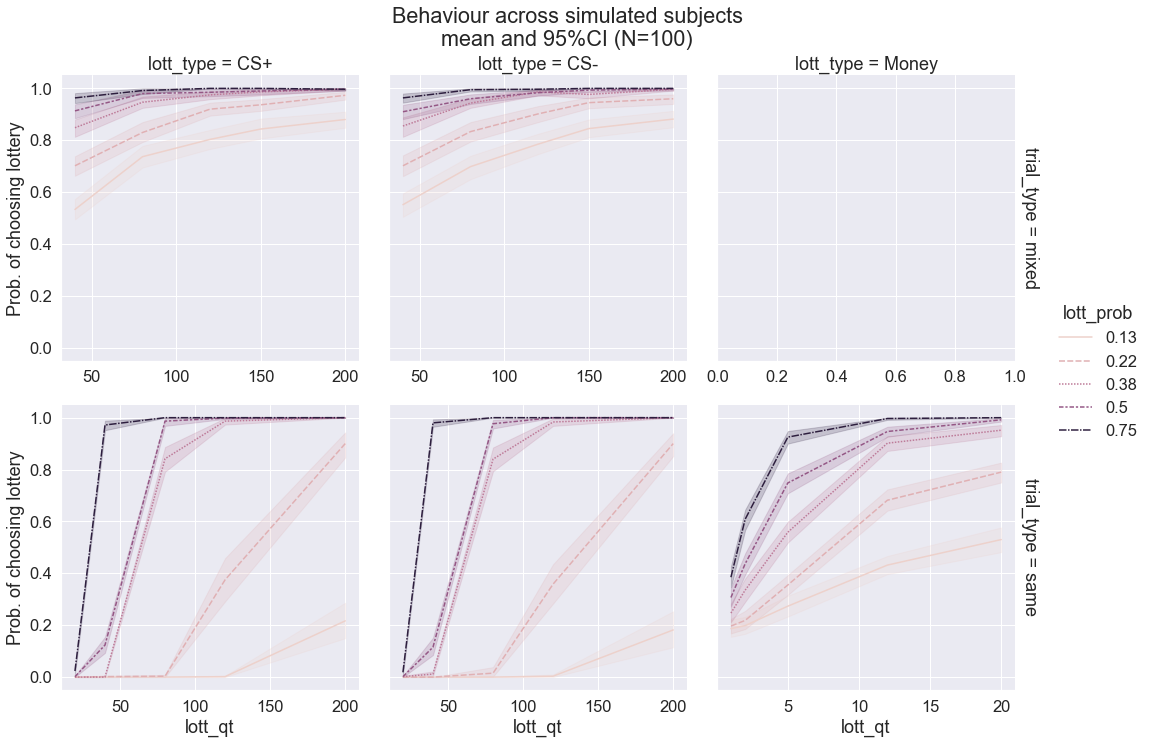

In [52]:
from tqdm import tqdm
from numpy import random

N_iter = 100
x0 = x0_10params

#                         (mean, sd, N_subs)
mean_std_st_money_alpha = (0.7, 0.1, N_iter)
mean_std_st_cPlus_alpha = (0.8, 0.1, N_iter)
mean_std_st_cMinus_alpha = (0.8, 0.1, N_iter)
mean_std_st_money_beta = (1.8, 0.3, N_iter)
mean_std_st_cPlus_beta = mean_std_st_money_beta
mean_std_st_cMinus_beta = mean_std_st_money_beta
mean_std_mt_cPlus_beta = mean_std_st_money_beta
mean_std_mt_cMinus_beta = mean_std_st_money_beta
mean_std_cPlus_sFactor = (.2, 0.05, N_iter)
mean_std_cMinus_sFactor = mean_std_cPlus_sFactor

st_money_alpha_arr = abs(random.normal(*mean_std_st_money_alpha))
st_cPlus_alpha_arr = abs(random.normal(*mean_std_st_cPlus_alpha))
st_cMinus_alpha_arr = abs(random.normal(*mean_std_st_cMinus_alpha))
st_money_beta_arr = abs(random.normal(*mean_std_st_money_beta))

cPlus_sFactor_arr = abs(random.normal(*mean_std_cPlus_sFactor))
cMinus_sFactor_arr = abs(random.normal(*mean_std_cMinus_sFactor))

if x0 == x0_6params:
    st_param_size = 4
    mt_param_size = 2
    st_cPlus_beta_arr = st_money_beta_arr
    st_cMinus_beta_arr = st_money_beta_arr
    mt_cPlus_beta_arr = st_money_beta_arr
    mt_cMinus_beta_arr = st_money_beta_arr
    
    st_pars = np.stack([st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                    st_money_beta_arr,] )

    mt_pars = np.stack([cPlus_sFactor_arr, cMinus_sFactor_arr])
    
else:    
    st_param_size = 6
    mt_param_size = 4
    st_cPlus_beta_arr = abs(random.normal(*mean_std_st_cPlus_beta))
    st_cMinus_beta_arr = abs(random.normal(*mean_std_st_cMinus_beta))
    mt_cPlus_beta_arr = abs(random.normal(*mean_std_mt_cPlus_beta))
    mt_cMinus_beta_arr = abs(random.normal(*mean_std_mt_cMinus_beta))
    
    st_pars = np.stack([st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                    st_money_beta_arr, st_cPlus_beta_arr, st_cMinus_beta_arr,
                    ] )

    mt_pars = np.stack([mt_cPlus_beta_arr, mt_cMinus_beta_arr,
                        cPlus_sFactor_arr, cMinus_sFactor_arr])
    
st_flags = []
mt_flags = []


st_estPars = np.zeros((st_param_size, N_iter))
mt_estPars = np.zeros((mt_param_size, N_iter))
st_hessians = np.zeros((st_param_size, st_param_size, N_iter))
mt_hessians = np.zeros((mt_param_size, mt_param_size, N_iter))

import warnings
warnings.filterwarnings("ignore")

for i in tqdm(range(N_iter)):
    # Get parameters per participant
    st_money_alpha = st_money_alpha_arr[i]
    st_cPlus_alpha = st_cPlus_alpha_arr[i]
    st_cMinus_alpha = st_cMinus_alpha_arr[i]
    st_money_beta = st_money_beta_arr[i]
    st_cPlus_beta = st_cPlus_beta_arr[i]
    st_cMinus_beta = st_cMinus_beta_arr[i]
    mt_cPlus_beta = mt_cPlus_beta_arr[i]
    mt_cMinus_beta = mt_cMinus_beta_arr[i]
    cPlus_sFactor = cPlus_sFactor_arr[i]
    cMinus_sFactor = cMinus_sFactor_arr[i]

    subjectTrials_df = sim.pack_subjectParameters(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
                                                  st_money_beta, st_cPlus_beta, st_cMinus_beta, 
                                                  mt_cPlus_beta, mt_cMinus_beta, 
                                                  cPlus_sFactor, cMinus_sFactor, 
                                                  allTrials_df)
    
    _subject_choiceCount_df = pd.DataFrame(subjectTrials_df[beahviour_cols].groupby(
                    list(subjectTrials_df[beahviour_cols].columns[:-1])
                    ).apply(
                lambda df: get_probLottery(df)), 
                columns = [_v_.probLotteryChoice_colName]).reset_index()
    _subject_choiceCount_df['iter'] = i
    
    if i == 0:
        subject_choiceCount_df = _subject_choiceCount_df
    else:
        subject_choiceCount_df = pd.concat([subject_choiceCount_df, _subject_choiceCount_df], axis = 0)
        
import seaborn as sns
sns.set(font_scale=1.5)
g = sns.relplot(
    data=subject_choiceCount_df.reset_index(drop=True), x=beahviour_cols[-3], y=_v_.probLotteryChoice_colName, 
    col="lott_type", row = 'trial_type',
    hue="lott_prob", style="lott_prob", kind="line",facet_kws={'sharex': False, 'margin_titles' : True},
)

g.fig.suptitle('Behaviour across simulated subjects\nmean and 95%CI (N={})'.format(N_iter), va='bottom');

# Simulate behaviour and extract fitted parameters

## Task Parameters

In [53]:
uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [1]                               # Euros
st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 80, 120, 200]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))

Trials per type:
same     450
mixed    300
Name: trial_type, dtype: int64


## Initialization Parameters

In [11]:
alphaMoney0 = 1
alphaCplus0 = 1
alphaCminus0 = 1
st_betaMoney0 = 1 # also used in model with only one beta
st_betaCplus0 = 1
st_betaCminus0 = 1
mt_betaCplus0 = 1
mt_betaCminus0 = 1
sFactorCplus0 = 1
sFactorCminus0= 1


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

## Run simulation and plot behaviour

100%|██████████| 100/100 [02:44<00:00,  1.64s/it]


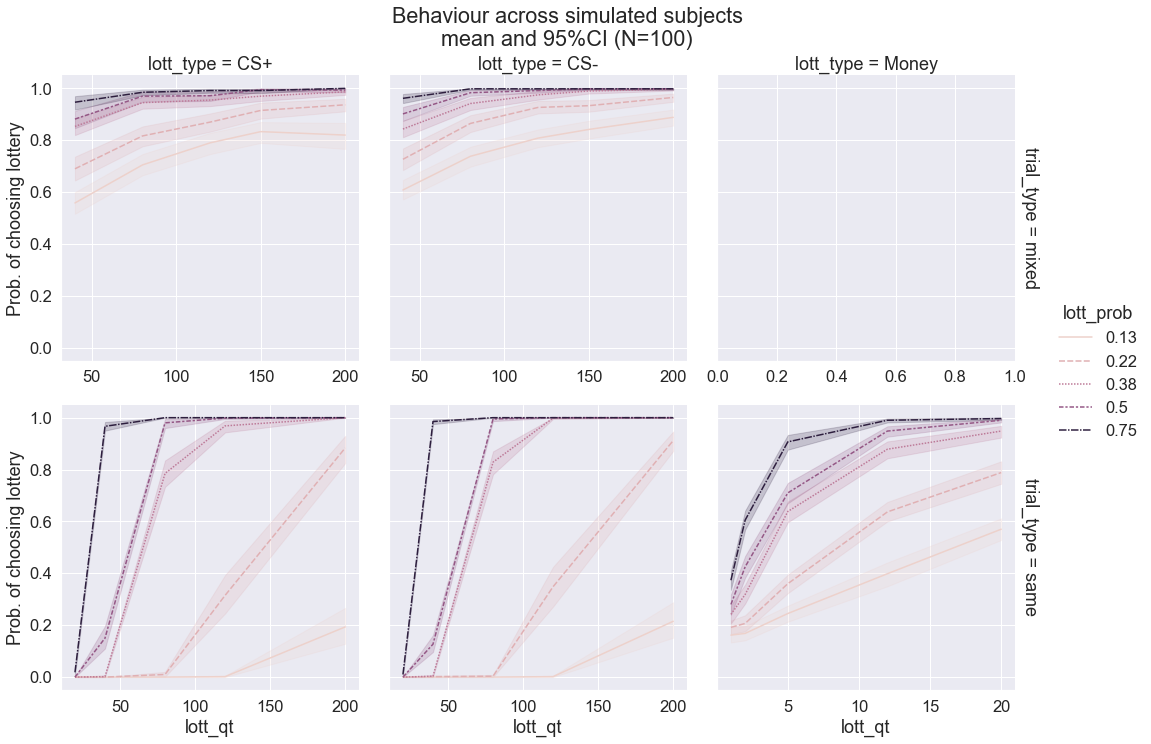

In [55]:
from tqdm import tqdm
from numpy import random

N_iter = 100
x0 = x0_6params

#                         (mean, sd, N_subs)
mean_std_st_money_alpha = (0.7, 0.1, N_iter)
mean_std_st_cPlus_alpha = (0.8, 0.1, N_iter)
mean_std_st_cMinus_alpha = (0.8, 0.1, N_iter)
mean_std_st_money_beta = (1.8, 0.3, N_iter)
mean_std_st_cPlus_beta = mean_std_st_money_beta
mean_std_st_cMinus_beta = mean_std_st_money_beta
mean_std_mt_cPlus_beta = mean_std_st_money_beta
mean_std_mt_cMinus_beta = mean_std_st_money_beta
mean_std_cPlus_sFactor = (.2, 0.05, N_iter)
mean_std_cMinus_sFactor = mean_std_cPlus_sFactor

st_money_alpha_arr = abs(random.normal(*mean_std_st_money_alpha))
st_cPlus_alpha_arr = abs(random.normal(*mean_std_st_cPlus_alpha))
st_cMinus_alpha_arr = abs(random.normal(*mean_std_st_cMinus_alpha))
st_money_beta_arr = abs(random.normal(*mean_std_st_money_beta))

cPlus_sFactor_arr = abs(random.normal(*mean_std_cPlus_sFactor))
cMinus_sFactor_arr = abs(random.normal(*mean_std_cMinus_sFactor))

if x0 == x0_6params:
    st_param_size = 4
    mt_param_size = 2
    st_cPlus_beta_arr = st_money_beta_arr
    st_cMinus_beta_arr = st_money_beta_arr
    mt_cPlus_beta_arr = st_money_beta_arr
    mt_cMinus_beta_arr = st_money_beta_arr
    
    st_pars = np.stack([st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                    st_money_beta_arr,] )

    mt_pars = np.stack([cPlus_sFactor_arr, cMinus_sFactor_arr])
    
else:    
    st_param_size = 6
    mt_param_size = 4
    st_cPlus_beta_arr = abs(random.normal(*mean_std_st_cPlus_beta))
    st_cMinus_beta_arr = abs(random.normal(*mean_std_st_cMinus_beta))
    mt_cPlus_beta_arr = abs(random.normal(*mean_std_mt_cPlus_beta))
    mt_cMinus_beta_arr = abs(random.normal(*mean_std_mt_cMinus_beta))
    
    st_pars = np.stack([st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                    st_money_beta_arr, st_cPlus_beta_arr, st_cMinus_beta_arr,
                    ] )

    mt_pars = np.stack([mt_cPlus_beta_arr, mt_cMinus_beta_arr,
                        cPlus_sFactor_arr, cMinus_sFactor_arr])
    
st_flags = []
mt_flags = []


st_estPars = np.zeros((st_param_size, N_iter))
mt_estPars = np.zeros((mt_param_size, N_iter))
st_hessians = np.zeros((st_param_size, st_param_size, N_iter))
mt_hessians = np.zeros((mt_param_size, mt_param_size, N_iter))

import warnings
warnings.filterwarnings("ignore")

for i in tqdm(range(N_iter)):
    # Get parameters per participant
    st_money_alpha = st_money_alpha_arr[i]
    st_cPlus_alpha = st_cPlus_alpha_arr[i]
    st_cMinus_alpha = st_cMinus_alpha_arr[i]
    st_money_beta = st_money_beta_arr[i]
    st_cPlus_beta = st_cPlus_beta_arr[i]
    st_cMinus_beta = st_cMinus_beta_arr[i]
    mt_cPlus_beta = mt_cPlus_beta_arr[i]
    mt_cMinus_beta = mt_cMinus_beta_arr[i]
    cPlus_sFactor = cPlus_sFactor_arr[i]
    cMinus_sFactor = cMinus_sFactor_arr[i]

    subjectTrials_df = sim.pack_subjectParameters(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
                                                  st_money_beta, st_cPlus_beta, st_cMinus_beta, 
                                                  mt_cPlus_beta, mt_cMinus_beta, 
                                                  cPlus_sFactor, cMinus_sFactor, 
                                                  allTrials_df)
    
    _subject_choiceCount_df = pd.DataFrame(subjectTrials_df[beahviour_cols].groupby(
                    list(subjectTrials_df[beahviour_cols].columns[:-1])
                    ).apply(
                lambda df: get_probLottery(df)), 
                columns = [_v_.probLotteryChoice_colName]).reset_index()
    _subject_choiceCount_df['iter'] = i

    if x0 == x0_10params:
        x0_ = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
                st_money_beta, st_cPlus_beta, st_cMinus_beta, 
                mt_cPlus_beta, mt_cMinus_beta, 
                cPlus_sFactor, cMinus_sFactor)
    else:
        x0_ = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
                st_money_beta, 
                cPlus_sFactor, cMinus_sFactor)
    
    res_st, res_mt, _st_iterParams_df, _mt_iterParams_df = sim.stepwise_estimate(subjectTrials_df, x0_)

    _st_iterParams_df = _st_iterParams_df.reset_index().rename(columns={'index':'estim. iter'},)
    _st_iterParams_df['iter'] = i
    
    _mt_iterParams_df = _mt_iterParams_df.reset_index().rename(columns={'index':'estim. iter'},)
    _mt_iterParams_df['iter'] = i

    if i == 0:
        st_iterParams_df = _st_iterParams_df
        mt_iterParams_df = _mt_iterParams_df
        subject_choiceCount_df = _subject_choiceCount_df
    else:
        st_iterParams_df = pd.concat([st_iterParams_df, _st_iterParams_df], axis = 0)
        mt_iterParams_df = pd.concat([mt_iterParams_df, _mt_iterParams_df], axis = 0)
        subject_choiceCount_df = pd.concat([subject_choiceCount_df, _subject_choiceCount_df], axis = 0)
    
    st_flags.append(res_st.message)
    mt_flags.append(res_mt.message)

    st_estPars[:, i] = res_st.x
    st_hessians[:, :, i] = res_st.hess_inv
    mt_estPars[:, i] = res_mt.x
    mt_hessians[:, :, i] = res_mt.hess_inv

    
sns.set(font_scale=1.5)
g = sns.relplot(
    data=subject_choiceCount_df.reset_index(drop=True), x=beahviour_cols[-3], y=_v_.probLotteryChoice_colName, 
    col="lott_type", row = 'trial_type',
    hue="lott_prob", style="lott_prob", kind="line",facet_kws={'sharex': False, 'margin_titles' : True},

)

g.fig.suptitle('Behaviour across simulated subjects\nmean and 95%CI (N={})'.format(N_iter), va='bottom');

In [59]:
st_flags

['Optimization terminated successfully.',
 'Optimization terminated successfully.',
 'Optimization terminated successfully.',
 'Optimization terminated successfully.',
 'Optimization terminated successfully.',
 'Optimization terminated successfully.',
 'Optimization terminated successfully.',
 'Optimization terminated successfully.',
 'Optimization terminated successfully.',
 'Optimization terminated successfully.',
 'Optimization terminated successfully.',
 'Optimization terminated successfully.',
 'Optimization terminated successfully.',
 'Optimization terminated successfully.',
 'Optimization terminated successfully.',
 'Optimization terminated successfully.',
 'Desired error not necessarily achieved due to precision loss.',
 'Optimization terminated successfully.',
 'Optimization terminated successfully.',
 'Optimization terminated successfully.',
 'Optimization terminated successfully.',
 'Optimization terminated successfully.',
 'Optimization terminated successfully.',
 'Optimiza

## Pack same type trials results and plot parameters

In [63]:
print(st_flags)

['Optimization terminated successfully.', 'Optimization terminated successfully.', 'Optimization terminated successfully.', 'Optimization terminated successfully.', 'Optimization terminated successfully.', 'Optimization terminated successfully.', 'Optimization terminated successfully.', 'Optimization terminated successfully.', 'Optimization terminated successfully.', 'Optimization terminated successfully.', 'Optimization terminated successfully.', 'Optimization terminated successfully.', 'Optimization terminated successfully.', 'Optimization terminated successfully.', 'Optimization terminated successfully.', 'Optimization terminated successfully.', 'Desired error not necessarily achieved due to precision loss.', 'Optimization terminated successfully.', 'Optimization terminated successfully.', 'Optimization terminated successfully.', 'Optimization terminated successfully.', 'Optimization terminated successfully.', 'Optimization terminated successfully.', 'Optimization terminated success

In [64]:
st_success_df = pd.DataFrame(st_flags, columns = ['model fit'])
st_success_df.index.name = 'iter'

if x0 == x0_6params:
    st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'beta']
else:
    st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'Money beta', 'CS+ ST beta', 'CS- ST beta']


st_params_df = pd.DataFrame(st_pars).T
st_params_df.columns= st_params_colNames
st_params_df.index.name = 'iter'
st_params_df = st_params_df.reset_index().melt(id_vars = 'iter', var_name = 'parameter', value_name = 'Observed value')


st_estParams_df = pd.DataFrame(st_estPars).T
st_estParams_df.columns= st_params_colNames
st_estParams_df.index.name = 'iter'
st_estParams_df = st_estParams_df.reset_index().melt(id_vars = 'iter', var_name = 'parameter', value_name = 'Predicted value')

st_po_df = st_params_df.merge(st_estParams_df, on= ['iter','parameter'])
st_po_df = st_po_df.merge(st_success_df.reset_index(),on='iter')
st_po_df

,iter,parameter,Observed value,Predicted value,model fit
0,0,Money alpha,0.696792,0.720337,Optimization terminated successfully.
1,0,CS+ alpha,0.708725,0.739247,Optimization terminated successfully.
2,0,CS- alpha,0.705707,0.695874,Optimization terminated successfully.
3,0,beta,1.722637,1.524419,Optimization terminated successfully.
4,1,Money alpha,0.831191,0.812460,Optimization terminated successfully.
...,...,...,...,...,...
395,98,beta,1.531069,1.707565,Optimization terminated successfully.
396,99,Money alpha,0.584848,0.609020,Optimization terminated successfully.
397,99,CS+ alpha,0.772056,0.773965,Optimization terminated successfully.
398,99,CS- alpha,0.825385,0.823440,Optimization terminated successfully.


In [66]:
print(st_po_df['model fit'].unique())
st_pars_minMax = st_po_df[['parameter', 'Observed value']].groupby('parameter').describe().droplevel(0,axis = 1)[['min','max']].reindex(st_params_colNames)
st_pars_minMax

['Optimization terminated successfully.'
 'Desired error not necessarily achieved due to precision loss.']


,min,max
parameter,,
Money alpha,0.484697,0.954904
CS+ alpha,0.509414,1.072427
CS- alpha,0.627950,1.020012
beta,1.051817,2.697419


In [85]:
col_wrap = 3
fig = px.scatter(st_po_df , x= 'Predicted value', y='Observed value', color="model fit",
                 symbol = 'model fit', facet_col = 'parameter', facet_col_wrap = col_wrap,
                 category_orders={'parameter':st_params_colNames,
                                  'model fit':st_po_df['model fit'].unique() },
                facet_col_spacing=0.04, # default is 0.03
              height=600, width=800,
                )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_layout(
        title = '''Predicted vs Observed values (same type trials) <span style="font-size: 12px;">dashed line represents ideal result</span>'''
        )


fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[2,0] - st_pars_minMax.iloc[2,1]*0.025, x1=st_pars_minMax.iloc[2,1] + st_pars_minMax.iloc[2,1]*0.025, 
                       y0=st_pars_minMax.iloc[2,0] - st_pars_minMax.iloc[2,1]*0.025, y1=st_pars_minMax.iloc[2,1] + st_pars_minMax.iloc[2,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=0, 
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[0,0], x1=st_pars_minMax.iloc[0,1], 
                       y0=st_pars_minMax.iloc[0,0], y1=st_pars_minMax.iloc[0,1], 
                       line_color="black", line_dash='dash'), 
                  row=0, col=1,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[1,0] - st_pars_minMax.iloc[1,1]*0.025, x1=st_pars_minMax.iloc[1,1] + st_pars_minMax.iloc[1,1]*0.025, 
                       y0=st_pars_minMax.iloc[1,0] - st_pars_minMax.iloc[1,1]*0.025, y1=st_pars_minMax.iloc[1,1] + st_pars_minMax.iloc[1,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=2,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[3,0] - st_pars_minMax.iloc[3,1]*0.025, x1=st_pars_minMax.iloc[3,1] + st_pars_minMax.iloc[3,1]*0.025, 
                       y0=st_pars_minMax.iloc[3,0] - st_pars_minMax.iloc[3,1]*0.025, y1=st_pars_minMax.iloc[3,1] + st_pars_minMax.iloc[3,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=1,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )


if x0 != x0_6params:
    fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[5,0] - st_pars_minMax.iloc[5,1]*0.025, x1=st_pars_minMax.iloc[5,1] + st_pars_minMax.iloc[5,1]*0.025, 
                       y0=st_pars_minMax.iloc[5,0] - st_pars_minMax.iloc[5,1]*0.025, y1=st_pars_minMax.iloc[5,1] + st_pars_minMax.iloc[5,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=0,
                  label=dict(text="ideal result", textposition = 'bottom right', 
                             xanchor = 'right', yanchor='bottom', textangle=0),
                 )

    fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[4,0] - st_pars_minMax.iloc[4,1]*0.025, x1=st_pars_minMax.iloc[4,1] + st_pars_minMax.iloc[4,1]*0.025, 
                       y0=st_pars_minMax.iloc[4,0] - st_pars_minMax.iloc[4,1]*0.025, y1=st_pars_minMax.iloc[4,1] + st_pars_minMax.iloc[4,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=2,
                  label=dict(text="ideal result", textposition = 'bottom right', 
                             xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.show()
# fig.write_html("/mnt/data1/francisco/predicted vs observed same type parameters.html")

## Pack mixed type trials results and plot parameters

In [86]:
mt_success_df = pd.DataFrame(mt_flags, columns = ['model fit'])
mt_success_df.index.name = 'iter'

if x0 == x0_6params:
    mt_params_colNames = ['CS+ sFactor', 'CS- sFactor',]
else:
    mt_params_colNames = ['CS+ MT beta', 'CS- MT beta', 
                          'CS+ sFactor', 'CS- sFactor',]


mt_params_df = pd.DataFrame(mt_pars).T
mt_params_df.columns= mt_params_colNames
mt_params_df.index.name = 'iter'
mt_params_df = mt_params_df.reset_index().melt(id_vars = 'iter', var_name = 'parameter', value_name = 'Observed value')


mt_estParams_df = pd.DataFrame(mt_estPars).T
mt_estParams_df.columns= mt_params_colNames
mt_estParams_df.index.name = 'iter'
mt_estParams_df = mt_estParams_df.reset_index().melt(id_vars = 'iter', var_name = 'parameter', value_name = 'Predicted value')

mt_po_df = mt_params_df.merge(mt_estParams_df, on= ['iter','parameter'])
mt_po_df = mt_po_df.merge(mt_success_df.reset_index(),on='iter')
mt_po_df

,iter,parameter,Observed value,Predicted value,model fit
0,0,CS+ sFactor,0.142566,0.143833,Optimization terminated successfully.
1,0,CS- sFactor,0.121610,0.132198,Optimization terminated successfully.
2,1,CS+ sFactor,0.189990,0.206066,Optimization terminated successfully.
3,1,CS- sFactor,0.184677,0.181602,Optimization terminated successfully.
4,2,CS+ sFactor,0.216063,0.211786,Optimization terminated successfully.
...,...,...,...,...,...
195,97,CS- sFactor,0.162763,0.176942,Optimization terminated successfully.
196,98,CS+ sFactor,0.141680,0.124985,Optimization terminated successfully.
197,98,CS- sFactor,0.207903,0.211176,Optimization terminated successfully.
198,99,CS+ sFactor,0.114782,0.117818,Optimization terminated successfully.


In [88]:
print(mt_po_df['model fit'].unique())
mt_pars_minMax = mt_po_df[['parameter', 'Observed value']].groupby('parameter').describe().droplevel(0,axis = 1)[['min','max']].reindex(mt_params_colNames)
mt_pars_minMax

['Optimization terminated successfully.'
 'Desired error not necessarily achieved due to precision loss.']


,min,max
parameter,,
CS+ sFactor,0.083093,0.321650
CS- sFactor,0.092996,0.320776


In [91]:
col_wrap = 2
fig = px.scatter(mt_po_df , x= 'Predicted value', y='Observed value', color="model fit",
                 symbol = 'model fit', facet_col = 'parameter', facet_col_wrap = col_wrap,
                 category_orders={'parameter':mt_params_colNames,
                                  'model fit': ['Optimization terminated successfully.',
                                      'Desired error not necessarily achieved due to precision loss.']},
                facet_col_spacing=0.04, # default is 0.03
              height=600, width=800,
                )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_layout(
        title = '''Predicted vs Observed values (mixed type trials) <span style="font-size: 12px;">dashed line represents ideal result</span>'''
        )
fig.add_shape(dict(type="line", 
                       x0=mt_pars_minMax.iloc[1,0] - mt_pars_minMax.iloc[1,1]*0.025, x1=mt_pars_minMax.iloc[1,1] + mt_pars_minMax.iloc[1,1]*0.025, 
                       y0=mt_pars_minMax.iloc[1,0] - mt_pars_minMax.iloc[1,1]*0.025, y1=mt_pars_minMax.iloc[1,1] + mt_pars_minMax.iloc[1,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=0, 
                  # label=dict(text="ideal result", textposition = 'bottom left', 
                  #            xanchor = 'left', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=mt_pars_minMax.iloc[0,0] - mt_pars_minMax.iloc[0,1]*0.025, x1=mt_pars_minMax.iloc[0,1] + mt_pars_minMax.iloc[0,1]*0.025, 
                       y0=mt_pars_minMax.iloc[0,0] - mt_pars_minMax.iloc[0,1]*0.025, y1=mt_pars_minMax.iloc[0,1] + mt_pars_minMax.iloc[0,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=1, 
                  # label=dict(text="ideal result", textposition = 'bottom left', 
                  #            xanchor = 'left', yanchor='bottom', textangle=0),
                 )


    
fig.show()
# fig.write_html("/mnt/data1/francisco/predicted vs observed mixed type parameters.html")